In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('data/churn.csv', index_col=0)
labels = df.churn
features = df.drop('churn', axis=1)
features.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,calendar_updated,minimum_nights,number_of_reviews,reviews_per_month,days_since_last_review
19444,f,200.0,Entire home/apt,3,10.0,10.0,f,a few days or more,0.0,f,243.0,1.0,4 months ago,7,4,0.0,850.0
1520,f,450.0,Entire home/apt,4,10.0,10.0,f,a few days or more,0.0,f,208.0,1.0,2 weeks ago,3,7,0.0,505.0
1517,f,28.0,Shared room,1,0.0,0.0,f,a few days or more,0.0,f,364.0,1.0,6 weeks ago,1,0,0.0,3650.0
21691,f,48.0,Private room,2,8.0,6.0,f,a few days or more,0.0,f,143.0,1.0,4 months ago,1,1,0.0,612.0
21706,f,160.0,Private room,2,0.0,0.0,f,a few days or more,0.0,f,365.0,1.0,2 months ago,1,0,0.0,3650.0


In [3]:
drop_columns = ['host_response_time', 
                'calendar_updated',
                'days_since_last_review']

In [4]:
features.drop(drop_columns, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77201 entries, 19444 to 0
Data columns (total 14 columns):
host_is_superhost                 77201 non-null object
price                             77201 non-null float64
room_type                         77201 non-null object
accommodates                      77201 non-null int64
review_scores_cleanliness         77201 non-null float64
review_scores_location            77201 non-null float64
host_identity_verified            77201 non-null object
host_response_rate                77201 non-null float64
host_has_profile_pic              77201 non-null object
availability_365                  77201 non-null float64
calculated_host_listings_count    77201 non-null float64
minimum_nights                    77201 non-null int64
number_of_reviews                 77201 non-null int64
reviews_per_month                 77201 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 8.8+ MB


In [5]:
pd.get_dummies(features.drop(drop_columns, axis=1))

,price,accommodates,review_scores_cleanliness,review_scores_location,host_response_rate,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,reviews_per_month,host_is_superhost_f,host_is_superhost_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_identity_verified_f,host_identity_verified_t,host_has_profile_pic_f,host_has_profile_pic_t
19444,200.0,3,10.0,10.0,0.0,243.0,1.0,7,4,0.00,1,0,1,0,0,1,0,1,0
1520,450.0,4,10.0,10.0,0.0,208.0,1.0,3,7,0.00,1,0,1,0,0,1,0,1,0
1517,28.0,1,0.0,0.0,0.0,364.0,1.0,1,0,0.00,1,0,0,0,1,1,0,1,0
21691,48.0,2,8.0,6.0,0.0,143.0,1.0,1,1,0.00,1,0,0,1,0,1,0,1,0
21706,160.0,2,0.0,0.0,0.0,365.0,1.0,1,0,0.00,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21723,59.0,1,7.0,10.0,100.0,202.0,1.0,2,41,1.50,1,0,0,1,0,0,1,0,1
21724,90.0,1,9.0,9.0,79.0,251.0,1.0,3,17,0.86,1,0,0,1,0,0,1,0,1
21725,200.0,3,10.0,10.0,0.0,206.0,1.0,2,9,0.78,0,1,1,0,0,0,1,0,1
21712,235.0,2,10.0,9.0,90.0,104.0,1.0,3,4,2.45,1,0,1,0,0,1,0,0,1


In [6]:
feature_matrix = pd.get_dummies(features.drop(drop_columns, axis=1)).as_matrix()
feature_matrix

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[200.,   3.,  10., ...,   0.,   1.,   0.],
       [450.,   4.,  10., ...,   0.,   1.,   0.],
       [ 28.,   1.,   0., ...,   0.,   1.,   0.],
       ...,
       [200.,   3.,  10., ...,   1.,   0.,   1.],
       [235.,   2.,  10., ...,   0.,   0.,   1.],
       [ 49.,   5.,  10., ...,   1.,   0.,   1.]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3)

In [8]:
print(len(X_train))
print(len(X_test))

54040
23161


In [9]:
# create model (estimator) object
model = LogisticRegression(penalty='l1')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# fit model to training data
model.fit(X_train, y_train)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# make predictions
predictions = model.predict(X_test)
predictions

array([False,  True,  True, ..., False,  True,  True])

In [12]:
# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
accuracy

0.7149950347567031

In [13]:
model.score(X_test, y_test)

0.7149950347567031

In [14]:
df.churn.value_counts()

True     44626
False    32575
Name: churn, dtype: int64

# Feature Engineering and Normalization

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer

In [ ]:
features.head()

In [ ]:
categorical_columns = ['host_is_superhost', 'room_type', 'host_identity_verified', 'host_has_profile_pic']

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder=StandardScaler(), 
    sparse_threshold=0
)

In [ ]:
transformer

In [ ]:
transformer.fit_transform(features)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(penalty='l1'))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [ ]:
# fit model to training data
pipeline.fit(X_train, y_train)

# make predictions
predictions = pipeline.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

In [ ]:
y_pred = pipeline.predict(X_test)
y_score = pipeline.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm)

In [ ]:
plot_roc(y_test, y_score)

### Original Unscaled Features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

# create model (estimator) object
clf = LogisticRegression(penalty='l1')

# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

In [ ]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [ ]:
plot_roc(y_test, y_score)

# Model Selection and Hyperparameter Optimization

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

In [45]:
# See also https://scikit-learn.org/stable/modules/grid_search.html

scores = np.zeros((2, 6))
penalties = ['l1', 'l2']
regularization = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

for i, penalty in enumerate(penalties):
    for j, C in enumerate(regularization):
        clf = LogisticRegression(penalty=penalty, C=C,  solver='liblinear', max_iter=1500)

        scores[i, j] = cross_val_score(clf, X_train, y_train, cv=5).mean()

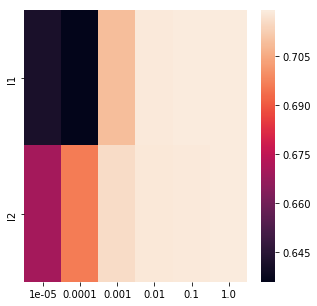

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(scores, xticklabels=regularization, yticklabels=penalties)

In [48]:
# Prefer L1 for sparsity constraints
scores[0].argmax()

# Create model with best performing hyperparameters
clf = LogisticRegression(penalty='l1', C=1.0)

# Fit on all of your (training) data
clf.fit(X_train, y_train)

# Evaluate on Holdout set
print(clf.score(X_test, y_test))

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7184120199468946
